# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **Shift + Enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Train-test Split

The train-test split means splitting the data into two parts: 

1. Training data (`train_data`)
1. Testing data (`test_data`)

The machine learning algorithm is trained on the `train_data`, and then it is applied to the `test_data`. The machine learning output is compared with the actual output for the `test_data` to evaluate how the model performs on 'unseen' data (data not known at the time of training).

This notebook is divided into the following parts:

1. [Read the Data](#read)
1. [Train-test Split](#tts)
1. [Visualise the Data](#visualise)
1. [Correct Way of Splitting Time-series Data](#correct)

## Import Libraries

In [1]:
# For data manipulation
import pandas as pd

# Import sklearn's train-test split module
from sklearn.model_selection import train_test_split

# For plotting
import matplotlib.pyplot as plt

<a id='read'></a> 
## Read the Data
The target (`y`) and features (`X`) prepared in the previous section for J. P. Morgan are loaded using the `read_csv` method of the `pandas` library.

In [2]:
# Read the features
X = pd.read_csv('../data_modules/JPM_features_2017_2019.csv',
                index_col=0, parse_dates=True)

# Read the target
y = pd.read_csv('../data_modules/JPM_target_2017_2019.csv',
                index_col=0, parse_dates=True)

<a id='tts'></a> 
## Train-test Split

In the train-test split you divide the data into two parts. 

<b>But what proportion is the data split into?</b>

Let us consider a student one day before university exams. If the exam is for 10 chapters, and the student attempts the exam only after studying 2 chapters. This would probably result in a poor performance in the exam. In the machine learning context, this situation is analogous to under-learning. Under-learning is when the model is trained on a very small `train_data`. For the university student to avoid under-learning, it can be recommended to study at least 7 or 8 out of the 10 chapters before appearing for the exam. Similarly, in machine learning, you should select the train-test split proportion such that the training data is a fair representation of the whole data. 

Say, if the train-test split is 80%-20%. It means 80% of the original data is the `train_data` and the remaining 20% is the `test_data`. The 80%-20% proportion is a popular proportion to split the data. But there is no rule of thumb that we always have to use the 80%-20% ratio. You can also try other popular proportion choices like 90%-10%, 75%-25%. 

We will use a ready-made method called `train_test_split` from the `sklearn` module to perform the train-test split.

Syntax:
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size, shuffle)
```

Parameters:
1. **X:** The features from the entire dataset.
1. **y:** The target values from the entire dataset.
1. **train_size:** The proportion of the training data.
1. **shuffle:** Parameter to specify shuffling of data.

Returns:
1. **X_train:** The features from the training dataset.
1. **X_test:** The features from the testing dataset.
1. **y_train:** The target values from the training dataset.
1. **y_test:** The target values from the testing dataset.

Let's use the `train_test_split` to split the data in an 80% train and 20% test proportion.

In [3]:
# Obtain the features and target for the `train_data` and `test_data`
# The features (X) and the target (y) is passed along with the size of the train_data as a percentage of the total data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

# Print the dimensions of the variables
print(f"The shape of the X variable is {X.shape}.")
print(f"The shape of the y variable is {y.shape}. \n")
print(f"The shape of the X_train variable is {X_train.shape}.")
print(f"The shape of the y_train variable is {y_train.shape}.\n")
print(f"The shape of the X_test variable is {X_test.shape}.")
print(f"The shape of the y_test variable is {y_test.shape}.\n")

The shape of the X variable is (19317, 7).
The shape of the y variable is (19317, 1). 

The shape of the X_train variable is (15453, 7).
The shape of the y_train variable is (15453, 1).

The shape of the X_test variable is (3864, 7).
The shape of the y_test variable is (3864, 1).



A few observations after the train-test split:
1. The dimensions of the original dataset show that there were 7 features and 19318 observations in the feature dataset (`X`). The target variable (`y`) has one column and the same number of observations as `X`.<br><br>
1. The dimensions of the `train_data` show that `X_train` has 7 features and 15454 observations. That is 80% of 19318, rounded down to the nearest integer. The target variable for the train data (`y_train`) has one column and the same number of observations as `X_train`.<br><br>
1. The dimensions of the `test_data` show that `X_test` has 7 features and 3864 observations. That is the balance 20% of 19318. The target variable for the train data (`y_test`) has one column and the same number of observations as `X_test`.

<a id='visualise'></a> 
## Visualise the Data

Let's plot one of the columns of the features to see how the data is split.

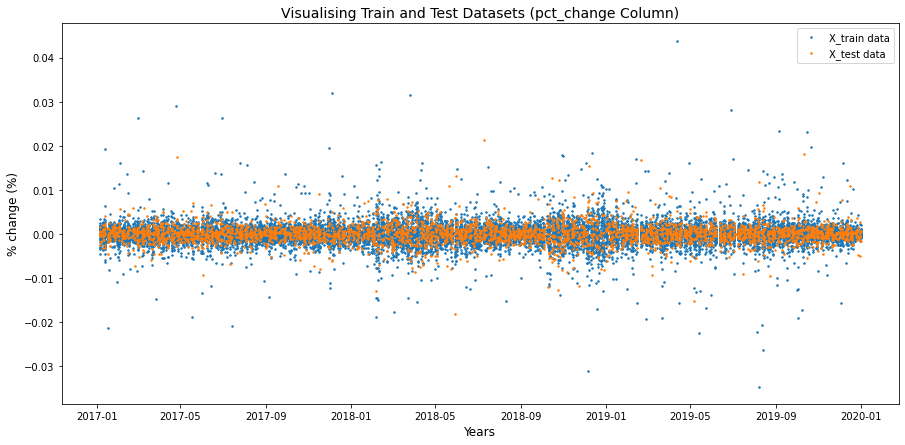

In [4]:
# Plot the data
plt.figure(figsize=(15, 7))

plt.plot(X_train['pct_change'], linestyle='None',
         marker='.', markersize=3.0, label='X_train data')
plt.plot(X_test['pct_change'], linestyle='None',
         marker='.', markersize=3.0, label='X_test data')

# Set the title and axis label
plt.title("Visualising Train and Test Datasets (pct_change Column)", fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('% change (%)', fontsize=12)

# Display the plot
plt.legend()
plt.show()

We can see that the `train_data` (blue points) and the `test_data` (orange points) are randomly shuffled.

<b>Do you want randomly shuffled data for our train and test datasets?</b>

The answer depends on what type of data you are handling. If you are handling discrete observations, like the number of faulty products in a factory production line, then you can shuffle the indices for the train-test split. But as seen in the above illustration, we are dealing with financial time-series data. For time-series data, the order of indices matters and you can not do random shuffling. This is because the indices in time series data are timestamps that occur one after the other (in sequence). The data would make no sense if the timestamps are shuffled. The reason for that is simple. You can not use the data from 2021 to train your model, and then use the model to predict the prices in 2017. It is not possible in real life as we do not have access to future data.

<a id='correct'></a> 
## Correct Way of Splitting Time-series Data

To split the time-series data we must not shuffle the datasets. We can specify the `shuffle` parameter to `False`. It is set to `True` by default, so not specifying it in the method call results in a shuffled output.

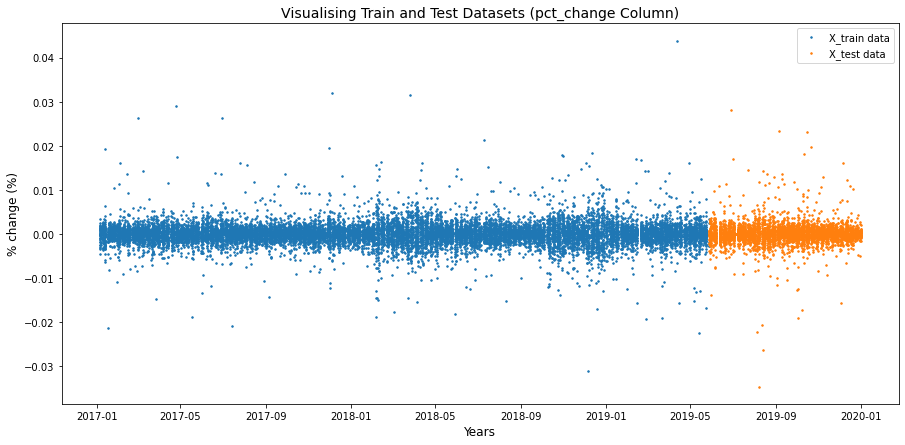

In [5]:
# Obtain the features and target for the `train_data` and `test_data` without shuffling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.80, shuffle=False)

# Plot the data
plt.figure(figsize=(15, 7))

plt.plot(X_train['pct_change'], linestyle='None',
         marker='.', markersize=3.0, label='X_train data')
plt.plot(X_test['pct_change'], linestyle='None',
         marker='.', markersize=3.0, label='X_test data')

# Set the title and axis label
plt.title("Visualising Train and Test Datasets (pct_change Column)", fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('% change (%)', fontsize=12)

# Display the plot
plt.legend()
plt.show()

### Save the Files on Your Disk

The dataframes `X` and `y` have the features and target variables stored. For further use, you can export this into a CSV file using the `to_csv` method of `pandas`. 

Syntax:
```python
DataFrame.to_csv(file_name)
```

The above line will save `DataFrame` as a CSV file with the name `file_name` on your local disk.

<b>The following cell will not run in the browser. Download this notebook and convert the cell to "Code" type.</b>

As seen on the plot, the train and test data points are not shuffled. The model is trained on `train_data` (blue part) and then the performance is evaluated for the `test_data` (orange part). The previous issue where we possibly were using future data to predict the past will not occur now. In this illustration, the model will be trained on data up to May 2019 (blue part) and then the model will be used to make predictions for the future.

Now that you have learned how to split the data, let's try to train a model and use the trained model to make some predictions.
<br><br>